In [5]:
pip install torch


   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/212.5 MB 10.0 MB/s eta 0:00:22
   - -------------------------------------- 9.4/212.5 MB 30.9 MB/s eta 0:00:07
   --- ------------------------------------ 19.7/212.5 MB 38.8 MB/s eta 0:00:05
   ----- ---------------------------------- 29.1/212.5 MB 41.0 MB/s eta 0:00:05
   ------- -------------------------------- 39.3/212.5 MB 42.4 MB/s eta 0:00:05
   --------- ------------------------------ 50.3/212.5 MB 44.5 MB/s eta 0:00:04
   ----------- ---------------------------- 61.6/212.5 MB 45.6 MB/s eta 0:00:04
   ------------- -------------------------- 71.0/212.5 MB 45.3 MB/s eta 0:00:04
   --------------- ------------------------ 82.8/212.5 MB 46.3 MB/s eta 0:00:03
   ----------------- ---------------------- 92.8/212.5 MB 46.3 MB/s eta 0:00:03
   ------------------ -------------------- 102.8/212.5 MB 46.5 MB/s eta 0:00:03
   --------------------- ----------------- 114.6/2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install torchvision


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.6 MB/s eta 0:00:00


In [4]:
pip install torchaudio

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Sample data (1 input feature, 1 output target)
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])   # shape: (4, 1)
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])   # y = 2x (linear function)

# Define a simple feedforward network: 1 hidden layer with 2 neurons
model = nn.Sequential(
    nn.Linear(1, 2),    # input → hidden layer (1 input to 2 neurons)
    nn.ReLU(),          # activation function
    nn.Linear(2, 1)     # hidden → output layer (2 neurons to 1 output)
)

# Define Mean Squared Error loss
criterion = nn.MSELoss()

# Optimizer: Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train for 100 epochs
for epoch in range(100):
    # 1. Forward pass (prediction)
    y_pred = model(x)

    # 2. Compute loss
    loss = criterion(y_pred, y)

    # 3. Backward pass (compute gradients using calculus)
    optimizer.zero_grad()   # clear old gradients
    loss.backward()         # 🔁 backpropagation happens here

    # 4. Update weights
    optimizer.step()

    # Print progress every 10 steps
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}')`

Epoch 0: Loss = 33.9633
Epoch 10: Loss = 24.3361
Epoch 20: Loss = 17.9089
Epoch 30: Loss = 13.6181
Epoch 40: Loss = 10.7535
Epoch 50: Loss = 8.8411
Epoch 60: Loss = 7.5643
Epoch 70: Loss = 6.7120
Epoch 80: Loss = 6.1429
Epoch 90: Loss = 5.7630


In [2]:
from astropy.io import fits
from astropy.table import Table

# Replace with your actual path
file_path = r'C:\Users\ravis\Downloads\GalaxyZoo1_DR_table2.fits'

# Open and load the FITS file
with fits.open(file_path) as hdul:
    hdul.info()  # Check contents
    data = Table(hdul[1].data)  # Usually data is in HDU 1

# Preview the table
print(data.colnames)
print(data[:5])

Filename: C:\Users\ravis\Downloads\GalaxyZoo1_DR_table2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (1253,)   uint8   
  1                1 BinTableHDU     47   667944R x 16C   [K, 11A, 11A, I, E, E, E, E, E, E, E, E, E, I, I, I]   
['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN']
      OBJID             RA         DEC     NVOTE  P_EL  P_CW ... P_EL_DEBIASED P_CS_DEBIASED SPIRAL ELLIPTICAL UNCERTAIN
------------------ ----------- ----------- ----- ----- ----- ... ------------- ------------- ------ ---------- ---------
587727178986356823 00:00:00.41 -10:22:25.7    59  0.61 0.034 ...          0.61         0.186      0          0         1
587727227300741210 00:00:00.74 -09:13:20.2    18 0.611   0.0 ...         0.203         0.797      1          0         0
587727225153257596 00:00:01.03 -10:56:48.0    68 0.735 0

In [4]:
from astropy.io import fits
from astropy.table import Table

# Load data
file_path = r'C:\Users\ravis\Downloads\GalaxyZoo1_DR_table2.fits'

with fits.open(file_path) as hdul:
    data = Table(hdul[1].data)

df = data.to_pandas()

# Let's preview available columns
print(df.columns)

# Select clear spirals (debiased spiral prob > 0.8)
spirals = df[df['P_CS_DEBIASED'] > 0.8]

# Select clear ellipticals (debiased elliptical prob > 0.8)
ellipticals = df[df['P_EL_DEBIASED'] > 0.8]

# Preview result counts
print("Spirals:", len(spirals))
print("Ellipticals:", len(ellipticals))


Index(['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE',
       'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL',
       'ELLIPTICAL', 'UNCERTAIN'],
      dtype='object')
Spirals: 160014
Ellipticals: 84908


In [5]:
import pandas as pd
import requests
import os

# Assuming you already loaded your DataFrame `df`
df_sample = df[['OBJID', 'RA', 'DEC']].head(10)

# Create directory to save images
os.makedirs('galaxy_images', exist_ok=True)

for index, row in df_sample.iterrows():
    ra = row['RA']
    dec = row['DEC']
    objid = row['OBJID']

    url = f"https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale=0.396&width=128&height=128"

    response = requests.get(url)

    if response.status_code == 200:
        with open(f"galaxy_images/{objid}.jpg", 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {objid}")
    else:
        print(f"Failed to download {objid}")

Downloaded 587727178986356823
Downloaded 587727227300741210
Downloaded 587727225153257596
Downloaded 587730774962536596
Downloaded 587731186203885750
Downloaded 587727180060098638
Downloaded 587731187277627676
Downloaded 587727223024189605
Downloaded 587730775499407375
Downloaded 587727221950382424


In [6]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

IMAGE_DIR = 'galaxy_images'
IMAGE_SIZE = (128, 128)  # Choose a reasonable size

def load_and_preprocess_images(image_dir, image_size):
    images = []
    labels = []
    
    for objid, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(image_dir, f"{row['OBJID']}.jpg")
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB').resize(image_size)
            img_array = np.array(img) / 255.0  # normalize
            images.append(img_array)

            # Label: 0 for elliptical, 1 for spiral
            if row['SPIRAL'] == 1:
                labels.append(1)
            elif row['ELLIPTICAL'] == 1:
                labels.append(0)
            else:
                continue  # skip uncertain ones

    return np.array(images), np.array(labels)

X, y = load_and_preprocess_images(IMAGE_DIR, IMAGE_SIZE)
print("Image data shape:", X.shape)
print("Labels shape:", y.shape)

100%|████████████████████████████████████████████████████████████████████████| 667944/667944 [02:06<00:00, 5269.74it/s]


Image data shape: (10, 128, 128, 3)
Labels shape: (4,)


In [11]:
# Only keep galaxies with clear labels
filtered_df = df[(df['UNCERTAIN'] == 0)]

# Assign labels
# Spiral = 0, Elliptical = 1
filtered_df = filtered_df[(filtered_df['SPIRAL'] == 1) | (filtered_df['ELLIPTICAL'] == 1)].copy()
filtered_df['label'] = filtered_df['ELLIPTICAL']  # 1 for elliptical, 0 for spiral

print("Total spiral galaxies:", (filtered_df['label'] == 0).sum())
print("Total elliptical galaxies:", (filtered_df['label'] == 1).sum())


Total spiral galaxies: 190225
Total elliptical galaxies: 62190


In [ ]:
from PIL import Image
import requests
from io import BytesIO
import os

output_dir = 'galaxy_images'
os.makedirs(output_dir, exist_ok=True)

image_paths = []
labels = []

for index, row in filtered_df.iterrows():
    ra = row['RA']
    dec = row['DEC']
    objid = row['OBJID']
    label = row['label']  # 0 = spiral, 1 = elliptical

    url = f"https://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale=0.2&width=128&height=128"

    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        filename = os.path.join(output_dir, f"{objid}.jpg")
        img.save(filename)
        image_paths.append(filename)
        labels.append(label)
    except Exception as e:
        print(f"Failed to fetch image for {objid}: {e}")

In [8]:
def load_and_preprocess_images(image_dir, image_size, df):
    images = []
    labels = []
    
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(image_dir, f"{row['OBJID']}.jpg")
        
        # Filter only spiral or elliptical galaxies
        if not os.path.exists(img_path):
            continue
        if row['SPIRAL'] == 1:
            label = 1
        elif row['ELLIPTICAL'] == 1:
            label = 0
        else:
            continue  # Skip uncertain galaxies

        try:
            # Load and resize image
            img = Image.open(img_path).convert('RGB').resize(image_size)
            img_array = np.array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

    images = np.array(images)
    labels = np.array(labels)
    print(f"✅ Loaded {len(images)} images and {len(labels)} labels.")
    return images, labels


In [9]:
IMAGE_SIZE = (128, 128)
X, y = load_and_preprocess_images(IMAGE_DIR, IMAGE_SIZE, df)

100%|████████████████████████████████████████████████████████████████████████| 667944/667944 [02:11<00:00, 5095.16it/s]


✅ Loaded 4 images and 4 labels.


In [1]:
import os
import pandas as pd
from astropy.io import fits
from astropy.table import Table

# === Step 1: Load the FITS file ===
file_path = r'C:\Users\ravis\Downloads\GalaxyZoo1_DR_table2.fits'

with fits.open(file_path) as hdul:
    print("FITS file contents:")
    hdul.info()
    data = Table(hdul[1].data)  # HDU 1 usually contains the data

# Convert to DataFrame
df_full = data.to_pandas()

# === Step 2: Get list of downloaded image OBJIDs ===
image_dir = r'C:\Users\ravis\galaxy_images'
image_files = os.listdir(image_dir)

# Remove extensions and convert to integers
downloaded_objids = set()
for fname in image_files:
    name, ext = os.path.splitext(fname)
    if name.isdigit():
        downloaded_objids.add(int(name))

print(f"Found {len(downloaded_objids)} image files.")

# === Step 3: Filter DataFrame by OBJID ===
filtered_df = df_full[df_full['OBJID'].isin(downloaded_objids)].copy()
print(f"Filtered DataFrame contains {len(filtered_df)} entries.")

# === Step 4: Save filtered data ===

# Save as FITS
filtered_table = Table.from_pandas(filtered_df)
filtered_table.write('GalaxyZoo1_filtered_44k.fits', overwrite=True)
print("Saved filtered FITS file as GalaxyZoo1_filtered_44k.fits")

# Save as CSV
filtered_df.to_csv('GalaxyZoo1_filtered_44k.csv', index=False)
print("Saved filtered CSV file as GalaxyZoo1_filtered_44k.csv")

FITS file contents:
Filename: C:\Users\ravis\Downloads\GalaxyZoo1_DR_table2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (1253,)   uint8   
  1                1 BinTableHDU     47   667944R x 16C   [K, 11A, 11A, I, E, E, E, E, E, E, E, E, E, I, I, I]   
Found 43952 image files.
Filtered DataFrame contains 43952 entries.
Saved filtered FITS file as GalaxyZoo1_filtered_44k.fits
Saved filtered CSV file as GalaxyZoo1_filtered_44k.csv


In [2]:
from astropy.table import Table
import os

# Load the filtered FITS file
fits_path = r'C:\Users\ravis\GalaxyZoo1_filtered_44k.fits'
data = Table.read(fits_path)

# Preview columns and number of entries
print(data.colnames)
print(f"Total entries: {len(data)}")

['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN']
Total entries: 43952


In [3]:
import numpy as np
from PIL import Image
import tqdm

# Set paths
image_dir = r'C:\Users\ravis\galaxy_images'
image_size = (128, 128)  # Resize images

X = []
y = []

# Loop through entries
for row in tqdm.tqdm(data):
    objid = str(row['OBJID'])
    label = row['ELLIPTICAL']  # 1 = elliptical, 0 = spiral

    image_path = os.path.join(image_dir, f'{objid}.jpg')
    if os.path.exists(image_path):
        try:
            img = Image.open(image_path).resize(image_size).convert('RGB')
            X.append(np.array(img) / 255.0)  # Normalize
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

print("Image data shape:", X.shape)
print("Labels shape:", y.shape)

100%|████████████████████████████████████████████████████████████████████████████| 43952/43952 [07:58<00:00, 91.76it/s]


Image data shape: (43952, 128, 128, 3)
Labels shape: (43952,)


In [12]:
from astropy.table import Table
import pandas as pd

# Load data
data = Table.read(r'C:\Users\ravis\GalaxyZoo1_filtered_44k.fits').to_pandas()

# Keep only clearly labeled spiral or elliptical
filtered = data[
    ((data['SPIRAL'] == 1) & (data['ELLIPTICAL'] == 0)) |
    ((data['SPIRAL'] == 0) & (data['ELLIPTICAL'] == 1))
].copy()

# Check balance
print(filtered['SPIRAL'].value_counts())  # 1 = spiral, 0 = elliptical

SPIRAL
1    33181
0    10765
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

# Add a label column
filtered['label'] = filtered['SPIRAL'].apply(lambda x: 'spiral' if x == 1 else 'elliptical')

train_df, val_df = train_test_split(
    filtered, test_size=0.2, stratify=filtered['label'], random_state=42
)

In [14]:
import os
import shutil

def organize_images(df, set_type, src_dir='galaxy_images', dest_dir='dataset'):
    for _, row in df.iterrows():
        objid = str(row['OBJID']) + '.jpg'
        label = row['label']
        
        src_path = os.path.join(src_dir, objid)
        dest_path = os.path.join(dest_dir, set_type, label, objid)
        
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
        else:
            print(f"⚠️ Missing: {src_path}")

In [15]:
organize_images(train_df, 'train')
organize_images(val_df, 'val')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # or 'binary' if only 2 classes
)

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 35156 images belonging to 2 classes.
Found 8790 images belonging to 2 classes.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (35161, 128, 128, 3) (35161,)
Test set: (8791, 128, 128, 3) (8791,)


In [6]:
pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 1.8/375.7 MB 12.6 MB/s eta 0:00:30
    --------------------------------------- 5.2/375.7 MB 12.3 MB/s eta 0:00:31
    --------------------------------------- 7.6/375.7 MB 11.7 MB/s eta 0:00:32
   - -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\anaconda3\envs\marvin\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\ProgramData\anaconda3\envs\marvin\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 35156 images belonging to 2 classes.
Found 8790 images belonging to 2 classes.


C:\ProgramData\anaconda3\envs\marvin\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 364s 329ms/step - accuracy: 0.8800 - loss: 0.3014 - val_accuracy: 0.9397 - val_loss: 0.1729
Epoch 2/10
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 2:19 127ms/step - accuracy: 0.9375 - loss: 0.1427

C:\ProgramData\anaconda3\envs\marvin\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9375 - loss: 0.1427 - val_accuracy: 0.9377 - val_loss: 0.1781
Epoch 3/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 319s 291ms/step - accuracy: 0.9265 - loss: 0.1920 - val_accuracy: 0.9474 - val_loss: 0.1496
Epoch 4/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9375 - loss: 0.1760 - val_accuracy: 0.9483 - val_loss: 0.1448
Epoch 5/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 315s 287ms/step - accuracy: 0.9347 - loss: 0.1657 - val_accuracy: 0.9496 - val_loss: 0.1374
Epoch 6/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9062 - loss: 0.1150 - val_accuracy: 0.9497 - val_loss: 0.1391
Epoch 7/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 375s 342ms/step - accuracy: 0.9379 - loss: 0.1608 - val_accuracy: 0.9481 - val_loss: 0.1364
Epoch 8/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8750 - loss: 0.2692 - val_accuracy: 0.9479 - val_loss: 0.1395
Epoch 9/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 383s 349ms/step - accuracy: 0.9422 - lo

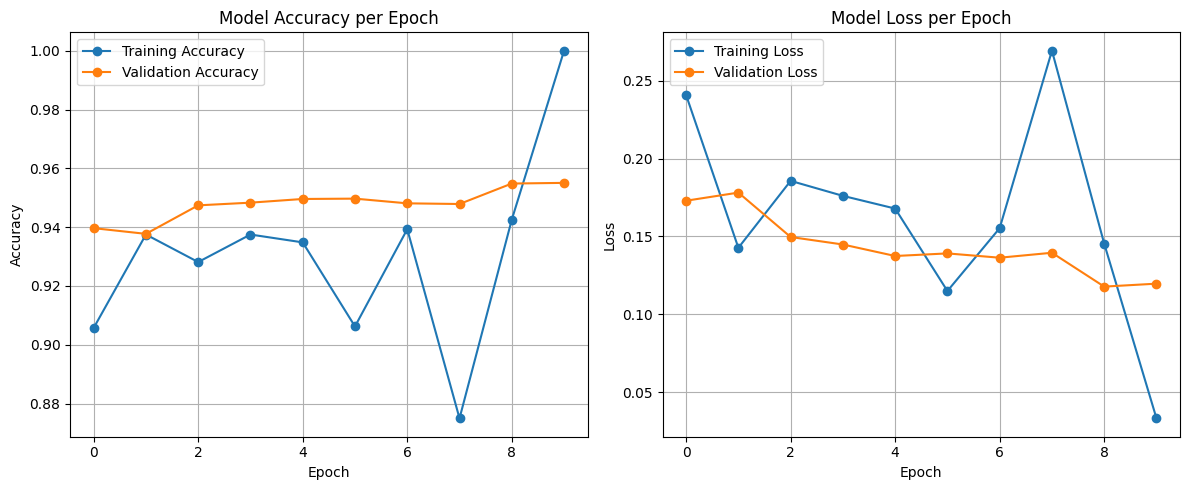

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Augmenting training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Random rotation between 0 and 20 degrees
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.15,        # Shear intensity
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Randomly flip images
    fill_mode='nearest'      # Fill in missing pixels
)

# No augmentation for validation data
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
)

# Plot training & validation accuracy and loss curves
plt.figure(figsize=(12, 5))

# === Accuracy plot ===
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# === Loss plot ===
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
loss, accuracy = model.evaluate(val_generator, steps=val_generator.samples // batch_size)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

274/274 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9623 - loss: 0.1098
Validation Loss: 0.1203
Validation Accuracy: 0.9577


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions for the entire validation set
val_generator.reset()  # Important to reset the generator before predicting

pred_probs = model.predict(val_generator, steps=val_generator.samples // batch_size + 1)
# Since sigmoid output is probability, convert to class labels
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# Get true labels from the generator
true_labels = val_generator.classes[:len(pred_labels)]

# Classification report
print(classification_report(true_labels, pred_labels, target_names=val_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)

275/275 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step
              precision    recall  f1-score   support

  elliptical       0.25      0.26      0.26      2153
      spiral       0.76      0.74      0.75      6637

    accuracy                           0.62      8790
   macro avg       0.50      0.50      0.50      8790
weighted avg       0.63      0.62      0.63      8790

Confusion Matrix:
[[ 568 1585]
 [1723 4914]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


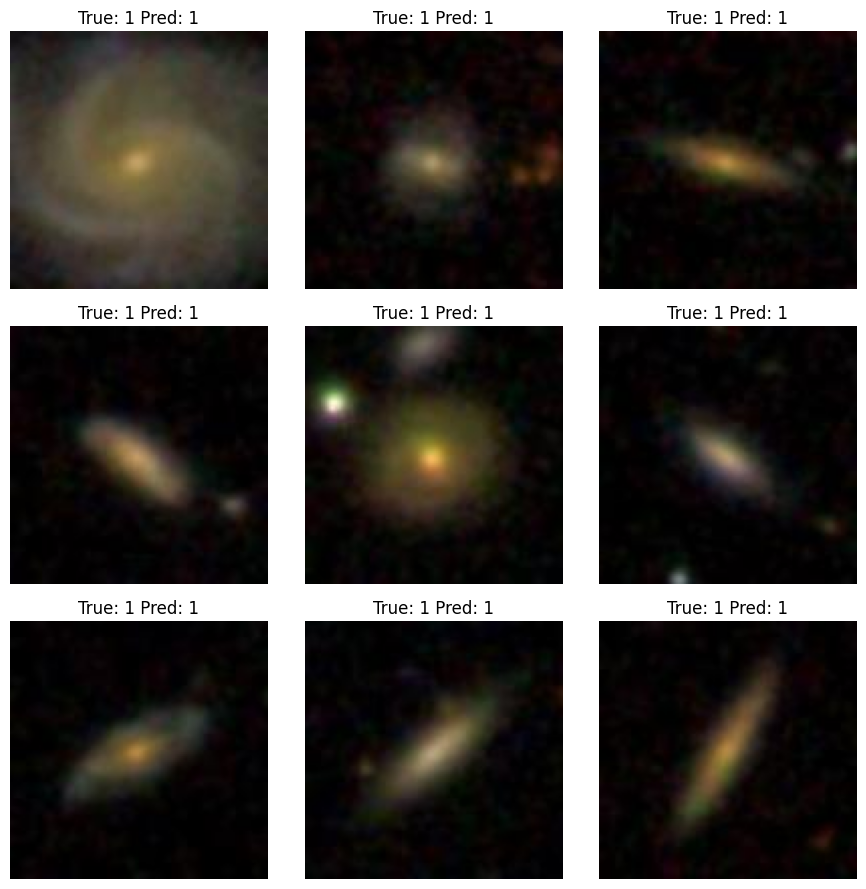

In [27]:
import matplotlib.pyplot as plt

val_generator.reset()
images, labels = next(val_generator)

preds = model.predict(images)
pred_labels = (preds > 0.5).astype(int).flatten()

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

for img, true_label, pred_label, ax in zip(images, labels, pred_labels, axes):
    ax.imshow(img)
    ax.set_title(f"True: {int(true_label)} Pred: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


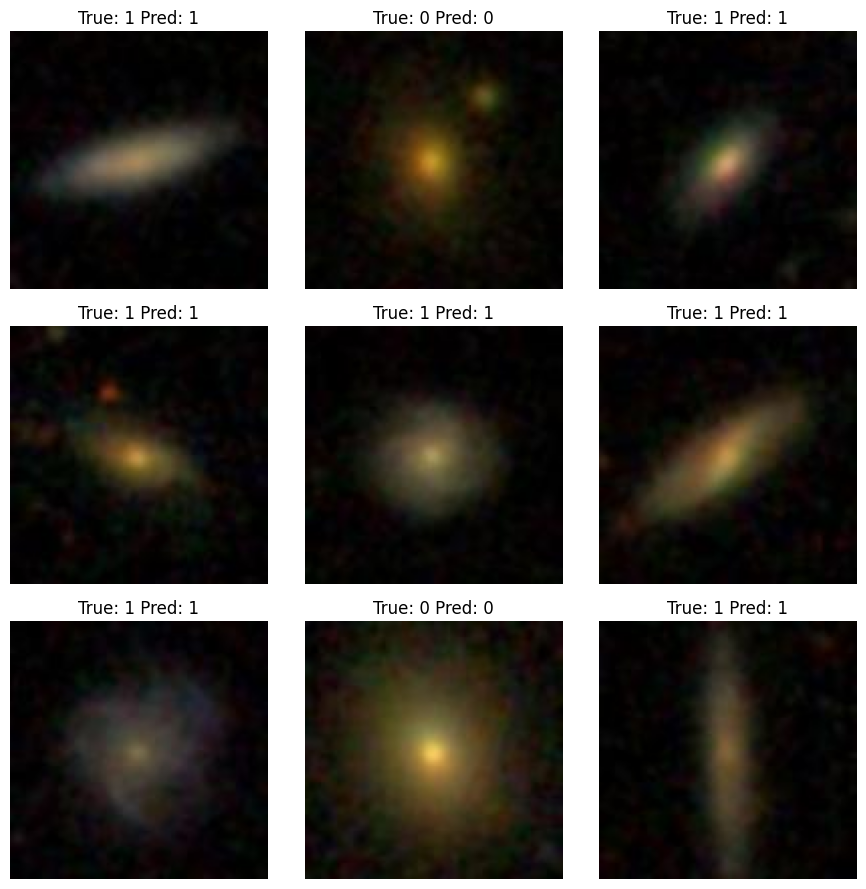

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get a full batch from the generator (which loads images from both classes)
val_generator.reset()
images, labels = next(val_generator)

# Predict
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# Create a figure
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

# Shuffle for diversity
indices = np.random.choice(range(len(images)), size=9, replace=False)

for idx, ax in zip(indices, axes):
    ax.imshow(images[idx])
    ax.set_title(f"True: {int(labels[idx])} Pred: {pred_labels[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()